In [1]:
!pip install ase

  Using cached https://files.pythonhosted.org/packages/5a/2f/b1f08bea98e5139a3e44029998c68c6e44f20a0504fc56ca6549e408e5f0/ase-3.19.0-py3-none-any.whl
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
from __future__ import print_function
import numpy as np
from ase import Atoms
from ase.units import eV, Ang, GPa
from files import Morse
calc = Morse.MorsePotential()

In [3]:
distance = 2.3 #set distance 

a = Atoms('2Cu', positions=[(0., 0., 0.), (0., 0., distance)])
a.set_calculator(calc) 

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from ipywidgets import interact

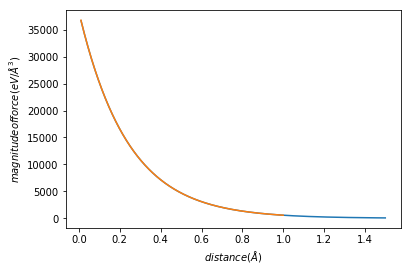

In [8]:
xmin = 0.01
xmax = 1.5
dx = 0.001
x = [i for i in np.arange(0.01,1.5,dx)]
e = [0]*len(x)
debydx = [0]*(len(x)-1)
avex = [0]*(len(x)-1)
for i in range(len(x)):
    a.positions[1,2] = x[i]
    e[i] = a.get_potential_energy()
for i in range(len(x)-1):   
    debydx[i] = (e[i]-e[i+1])/dx
    avex[i] = (x[i]+x[i+1])/2
plt.plot(avex, debydx)
plt.xlabel('$distance$')
plt.ylabel('$Negative gradient of potential energy$')

x = [i for i in np.arange(xmin,xmax-0.5,dx)]
f = [0]*len(x)
for i in range(len(x)):
    a.positions[1,2] = x[i]
    f[i] = abs(a.get_forces()[1,2])
plt.plot(x, f)
plt.xlabel('$distance (Å)$')
plt.ylabel('$magnitude of force (eV/Å^3) $')

plt.show()